In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("SaratogaHouses.csv")

In [3]:
dataset.drop('Unnamed', axis = 1, inplace=True)

In [4]:
dataset.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [5]:
x = dataset[["livingArea", "landValue", "rooms", "centralAir"]].values
y = dataset["price"].values

In [6]:
x[:10]

array([[906, 50000, 5, 'No'],
       [1953, 22300, 6, 'No'],
       [1944, 7300, 8, 'No'],
       [1944, 18700, 5, 'No'],
       [840, 15000, 3, 'Yes'],
       [1152, 14000, 8, 'No'],
       [2752, 23300, 8, 'No'],
       [1662, 14600, 9, 'No'],
       [1632, 22200, 8, 'No'],
       [1416, 21200, 6, 'No']], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()

In [9]:
x[:,-1] = encoder.fit_transform(x[:,-1])

In [10]:
x[:10]

array([[906, 50000, 5, 0],
       [1953, 22300, 6, 0],
       [1944, 7300, 8, 0],
       [1944, 18700, 5, 0],
       [840, 15000, 3, 1],
       [1152, 14000, 8, 0],
       [2752, 23300, 8, 0],
       [1662, 14600, 9, 0],
       [1632, 22200, 8, 0],
       [1416, 21200, 6, 0]], dtype=object)

In [11]:
pd.unique(dataset["fuel"])

array(['electric', 'gas', 'oil'], dtype=object)

In [12]:
fuel = dataset["fuel"].values

In [13]:
fuel[:10]

array(['electric', 'gas', 'gas', 'gas', 'gas', 'gas', 'oil', 'oil',
       'electric', 'gas'], dtype=object)

In [14]:
fuel = encoder.fit_transform(fuel)

In [15]:
fuel[:10]

array([0, 1, 1, 1, 1, 1, 2, 2, 0, 1])

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
oneHot = OneHotEncoder()

In [18]:
fuel = fuel.reshape([-1,1])
#fuel = fuel.reshape([len(fuel),1])

In [19]:
fuel[:10]

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0],
       [1]])

In [20]:
matrix = oneHot.fit_transform(fuel)

/anaconda3/envs/new/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [21]:
matrix.toarray()[:10]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
scaled_obj = scaler.fit(x[:,0:-1])

In [25]:
scaled_obj.var_

array([3.84097682e+05, 1.22577244e+09, 5.36284722e+00])

In [26]:
x[:,0:-1] = scaled_obj.transform(x[:,0:-1])

In [27]:
x[:10]

array([[-1.369854414453798, 0.4410841700670096, -0.8816315549989284, 0],
       [0.31951971170615984, -0.3500949957006358, -0.4498120178565962, 0],
       [0.304997871080143, -0.7785313670549564, 0.4138270564280683, 0],
       [0.304997871080143, -0.4529197248256727, -0.8816315549989284, 0],
       [-1.4763479123779215, -0.5586006964264051, -1.745270629283593, 1],
       [-0.972924104009338, -0.5871631211833599, 0.4138270564280683, 0],
       [1.6087364517269873, -0.3215325709436811, 0.4138270564280683, 0],
       [-0.15001980186838434, -0.570025666329187, 0.8456465935704005, 0],
       [-0.19842593728844043, -0.35295123817633123, 0.4138270564280683,
        0],
       [-0.5469501123128444, -0.381513662933286, -0.4498120178565962, 0]],
      dtype=object)

In [28]:
print(x[:,0].min(), x[:,0].max())
print(x[:,1].min(), x[:,1].max())
print(x[:,2].min(), x[:,2].max())

-1.837780390181007 5.603856161728951
-0.9813245828293348 10.797819386938787
-2.1770901664259252 2.1411052049973973


In [29]:
x.shape

(1728, 4)

In [30]:
x.shape[1]

4

In [31]:
y = y.reshape([-1,1])

In [32]:
y = scaler.fit_transform(y)

In [33]:
y[:10]

array([[-0.80748259],
       [-0.31349249],
       [-1.04627242],
       [-0.57885403],
       [-1.27937193],
       [-0.93449845],
       [-0.59917657],
       [-0.42643499],
       [-1.23933653],
       [-0.90503077]])

In [34]:
B = np.zeros(x.shape[1] + 1)

In [35]:
B

array([0., 0., 0., 0., 0.])

In [36]:
x0 = np.ones(x.shape[0])

In [37]:
x0

array([1., 1., 1., ..., 1., 1., 1.])

In [38]:
len(x0)

1728

In [39]:
new_x = np.array([x0, x[:,0], x[:,1], x[:,2], x[:,3]])

In [40]:
new_x

array([[1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       [-1.369854414453798, 0.31951971170615984, 0.304997871080143, ...,
        -1.0584416099181038, -0.8551358411538682, 0.32920093879017104],
       [0.4410841700670096, -0.3500949957006358, -0.7785313670549564,
        ..., -0.4043636027388497, -0.5071883318638867,
        -0.24441402409990337],
       [-0.8816315549989284, -0.4498120178565962, 0.4138270564280683,
        ..., -1.745270629283593, -0.017992480714263973,
        -0.4498120178565962],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [41]:
#B.shape

In [42]:
#new_x.shape

In [43]:
#new_x = new_x.T

In [44]:
#new_x.shape

In [45]:
#y_pred = np.dot(new_x,B)

In [46]:
#y_pred.shape

In [47]:
#y_pred[:10]

In [48]:
#y[:10]

In [49]:
#y_pred.shape, y.shape

In [50]:
#y = y.flatten()

In [51]:
#y_pred.shape, y.shape

In [52]:
#len(x.flatten())

In [53]:
#loss = y_pred - y

In [54]:
#loss

In [55]:
#new_x.shape, loss.shape

In [56]:
#new_x = new_x.T

In [57]:
#new_x.shape, loss.shape

In [58]:
#np.sum(loss)

In [59]:
#gradient = new_x.T.dot(loss)

In [60]:
#gradient.shape

In [61]:
#B.shape

In [62]:
#derivative = gradient / len(y)

In [63]:
#derivative

In [64]:
#learning_rate = 0.001

In [65]:
#derivative = derivative * learning_rate

In [66]:
#B = B - derivative

In [67]:
#B

In [68]:
#new_x.shape, B.shape

In [69]:
#y_pred = new_x.dot(B)

In [70]:
#y_pred

In [71]:
def cost_function(new_x,y,B):
    y_pred = new_x.T.dot(B)
    loss = y_pred - y.flatten()
    mse = np.sum(loss ** 2) / len(y)
    return mse

In [72]:
def gradient_descent(new_x,y,B,epochs,learning_rate):
    cost_history = np.zeros(epochs)
    for i in range(epochs):
        y_pred = new_x.T.dot(B)
        loss = y_pred - y.flatten()
        gradient = new_x.dot(loss)
        derivative = gradient / len(y)
        derivative = derivative * learning_rate
        B = B - derivative
        cost = cost_function(new_x,y,B)
        cost_history[i] = cost
    return B, cost_history

In [73]:
epochs = 2000
learning_rate = 0.001
B, cost_history = gradient_descent(new_x, y, B, epochs, learning_rate)

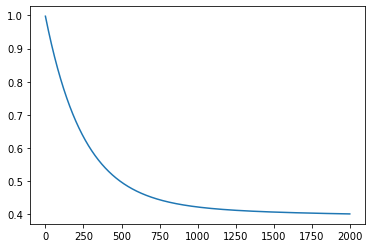

In [74]:
plt.plot(cost_history)

In [75]:
new_x.shape, B.shape

((5, 1728), (5,))

In [76]:
y_pred = new_x.T.dot(B)

In [77]:
from sklearn.metrics import mean_squared_error

In [79]:
mse = mean_squared_error(y, y_pred)

In [80]:
#rmse
np.sqrt(mse)

0.6327545912986244